# Motor Identification

In [39]:
import sys
sys.path.append('..')

In [40]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [41]:
from ctrl.algo import Proportional, PID, VelocityController, OpenLoop

In [29]:
from ctrl.client import Controller
HOST, PORT = "192.168.10.106", 9999
controller = Controller(HOST, PORT)

In [42]:
from ctrl.sim import Controller
controller = Controller()

In [43]:
controller.set_controller1(OpenLoop())
controller.set_reference1_mode(1)
with controller:
    time.sleep(5)

In [44]:
controller.reset_logger()
controller.set_encoder1(0)
with controller:
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(5)
log = controller.get_log()

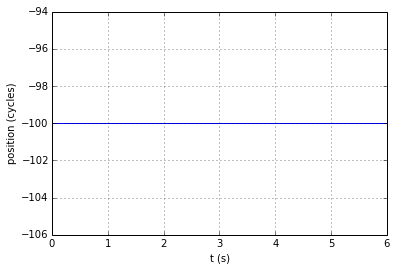

In [45]:
t = log[:,0]
position = log[:,1]
plt.plot(t, position)
plt.xlabel('t (s)')
plt.ylabel('position (cycles)')
plt.grid()

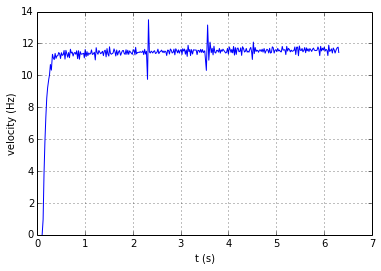

In [19]:
log = controller.get_log()
t = log[:,0]
position = log[:,1]
velocity = np.zeros(t.shape, float)
velocity[1:] = (position[1:]-position[:-1])/(t[1:]-t[:-1])
plt.plot(t, velocity)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

## Static Curve

In [9]:
controller.reset_logger()
dT = 3
controller.set_encoder1(0)
with controller:
    time.sleep(1)
    for duty_cycle in range(0,100,5):
        print('duty cycle = {}%'.format(100-duty_cycle))
        controller.set_reference1(100-duty_cycle)
        time.sleep(dT)
log = controller.get_log()

duty cycle = 100%
duty cycle = 95%
duty cycle = 90%
duty cycle = 85%
duty cycle = 80%
duty cycle = 75%
duty cycle = 70%
duty cycle = 65%
duty cycle = 60%
duty cycle = 55%
duty cycle = 50%
duty cycle = 45%
duty cycle = 40%
duty cycle = 35%
duty cycle = 30%
duty cycle = 25%
duty cycle = 20%
duty cycle = 15%
duty cycle = 10%
duty cycle = 5%


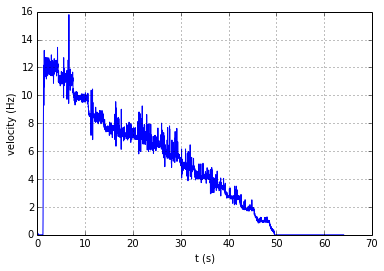

In [10]:
t = log[:,0]
position = log[:,1]
velocity = np.zeros(t.shape, float)
velocity[1:] = (position[1:]-position[:-1])/(t[1:]-t[:-1])
plt.plot(t, velocity)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

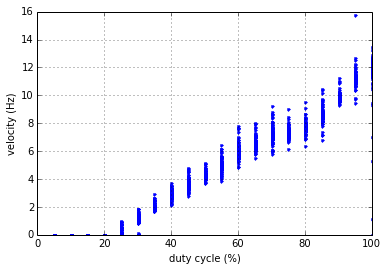

In [11]:
reference = log[:,2]
plt.plot(reference,velocity,'.')
plt.xlabel('duty cycle (%)')
plt.ylabel('velocity (Hz)')
plt.grid()

In [12]:
A = np.vstack(reference)
b = velocity
G, res, rank, sv = np.linalg.lstsq(A,b)
print(G)

[ 0.09935807]


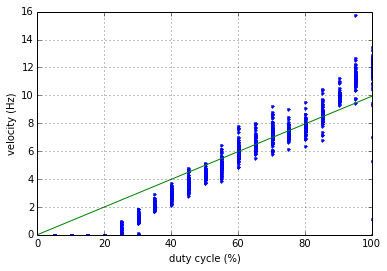

In [13]:
plt.plot(reference, velocity, '.', 
         np.array([0,100]), G*np.array([0,100]), '-')
plt.xlabel('duty cycle (%)')
plt.ylabel('velocity (Hz)')
plt.grid()

## Dynamic Model

In [14]:
controller.reset_logger()
with controller:
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(5)
log = controller.get_log()

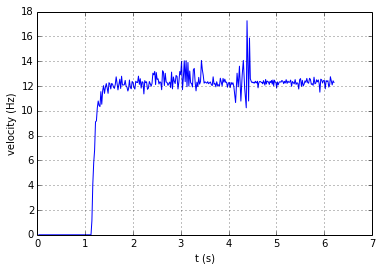

In [15]:
t = log[:,0]
position = log[:,1]
velocity = np.zeros(t.shape, float)
velocity[1:] = (position[1:]-position[:-1])/(t[1:]-t[:-1])
plt.plot(t, velocity)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

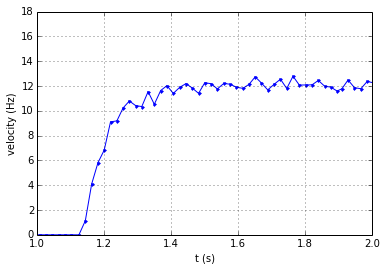

In [16]:
plt.plot(t, velocity, '.-')
plt.xlim(1,2)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

In [17]:
vmax = np.mean(velocity[np.where(t > 1.4)])
print(vmax)
0.63 * vmax

12.3335806095


7.7701557840091127

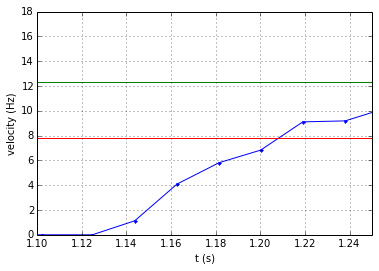

In [18]:
plt.plot(t, velocity, '.-', 
         np.array([t[0],t[-1]]), np.array(2*[vmax]), '-',
         np.array([t[0],t[-1]]), np.array(2*[0.63*vmax]), '-')
plt.xlim(1.1,1.25)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

In [19]:
tau = 1.21-1.13
a = 1/tau
print(a)

12.49999999999999


## Closed-loop on Velocity (Proportional Control)

In [20]:
G = 10
reference = 10

In [27]:
controller.set_controller1(VelocityController(Proportional(100 / G, reference / 100)))

In [28]:
controller.reset_logger()
with controller:
    controller.set_reference1(0)
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(5)
log = controller.get_log()

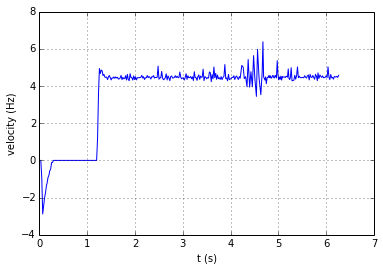

In [29]:
t = log[:,0]
position = log[:,1]
velocity = np.zeros(t.shape, float)
velocity[1:] = (position[1:]-position[:-1])/(t[1:]-t[:-1])
plt.plot(t, velocity)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

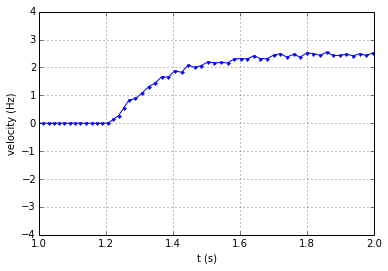

In [77]:
plt.plot(t, velocity, '.-')
plt.xlim(1,2)
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

In [70]:
controller.set_controller1(None)
with controller:
    controller.set_reference1(0)

## Closed-loop on Position (Proportional Control)

In [50]:
G = 10
reference = 20
controller.set_controller1(Proportional(2400 / G, reference / 100))

In [44]:
controller.set_encoder1(0)
controller.set_reference1_mode(1)
controller.reset_logger()
with controller:
    time.sleep(10)
log = controller.get_log() 

In [51]:
controller.set_encoder1(0)
controller.set_reference1_mode(0)
controller.reset_logger()
with controller:
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(3)
    controller.set_reference1(90)
    time.sleep(3)
log = controller.get_log()

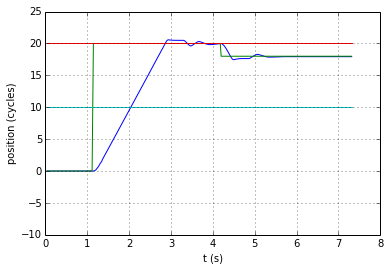

In [52]:
t = log[:,0]
position = log[:,1]
ref = log[:,2]
plt.plot(t, position, 
         t, reference*ref/100,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('position (cycles)')
plt.grid()

In [39]:
controller.reset_logger()
with controller:
    controller.set_reference1(0)
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(3)
    controller.set_reference1(50)
    time.sleep(3)
    controller.set_reference1(-50)
    time.sleep(3)

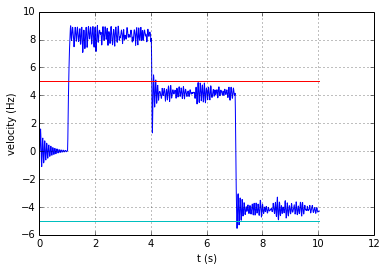

In [40]:
log = controller.get_log()
t = log[:,0]
velocity = np.zeros(t.shape, float)
velocity[1:] = (log[1:,1]-log[:-1,1])/controller.period
t = log[:,0]
plt.plot(t, velocity,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

### Closed-loop on Velocity (PI Control)

In [44]:
controller.set_controller1(VelocityController(PID(1 / k, a / k, 0, reference / 100)))

In [45]:
controller.reset_logger()
with controller:
    controller.set_reference1(0)
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(3)
    controller.set_reference1(50)
    time.sleep(3)
    controller.set_reference1(-50)
    time.sleep(3)

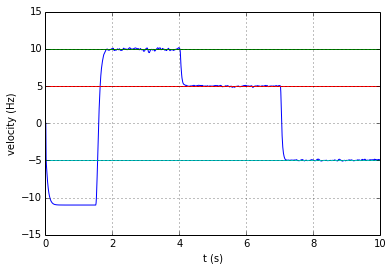

In [46]:
log = controller.get_log()
t = log[:,0]
velocity = np.zeros(t.shape, float)
velocity[1:] = (log[1:,1]-log[:-1,1])/controller.period
t = log[:,0]
plt.plot(t, velocity,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

### Closed-loop on Velocity (PI Control) Asynchronous

In [19]:
controller.reset_logger()
controller.start()
controller.set_reference1(100)

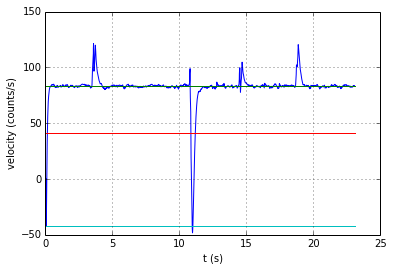

In [26]:
log = controller.get_log()
t = log[:,0]
velocity = np.zeros(t.shape, float)
velocity[1:] = (log[1:,1]-log[:-1,1])/controller.period
t = log[:,0]
plt.plot(t, velocity,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('velocity (counts/s)')
plt.grid()

In [24]:
controller.stop()

In [5]:
from IPython.html import widgets
from IPython.display import display, clear_output

def set_reference(value):
    print(value)
    
#a_slider = widgets.IntSliderWidget(min=-5, max=5, step=1, value=0)
b_slider = widgets.FloatSliderWidget(min=-5, max=5, step=0.3, value=0)
w=widgets.interactive(set_reference,value=(-100,100))
display(w)

59
